**What You're Aiming For**

- In this checkpoint, we are going to work on the 'Expresso churn' dataset that was provided as part of Expresso Churn Prediction Challenge hosted by Zindi platform.

**Dataset description:** Expresso is an African telecommunications services company that provides telecommunication services in two African markets: Mauritania and Senegal. The data describes 2.5 million Expresso clients with more than 15 behaviour variables in order to predict the clients' churn probability.

**Instructions**

- Install the necessary packages
- Import you data and perform basic data exploration phase
- Display general information about the dataset
- Create a pandas profiling reports to gain insights into the dataset
- Handle Missing and corrupted values
- Remove duplicates, if they exist
- Handle outliers, if they exist
- Encode categorical features
- Based on the previous data exploration train and test a machine learning classifier
- Create a streamlit application (locally)
- Add input fields for your features and a validation button at the end of the form
- Import your ML model into the streamlit application and start making predictions given the provided features values

In [1]:
# import all necessary libraries
import numpy as np
import pandas as pd

# for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# ggplot style sheet
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read and import file
df=pd.read_csv(r"C:\Users\chris\Downloads\Expresso_churn_dataset.csv")
df


,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


# Data Inspection 

In [3]:
# shape of data
df.shape

(2154048, 19)

In [4]:
# columns of the data
df.columns.tolist()

['user_id',
 'REGION',
 'TENURE',
 'MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'ZONE1',
 'ZONE2',
 'MRG',
 'REGULARITY',
 'TOP_PACK',
 'FREQ_TOP_PACK',
 'CHURN']

In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

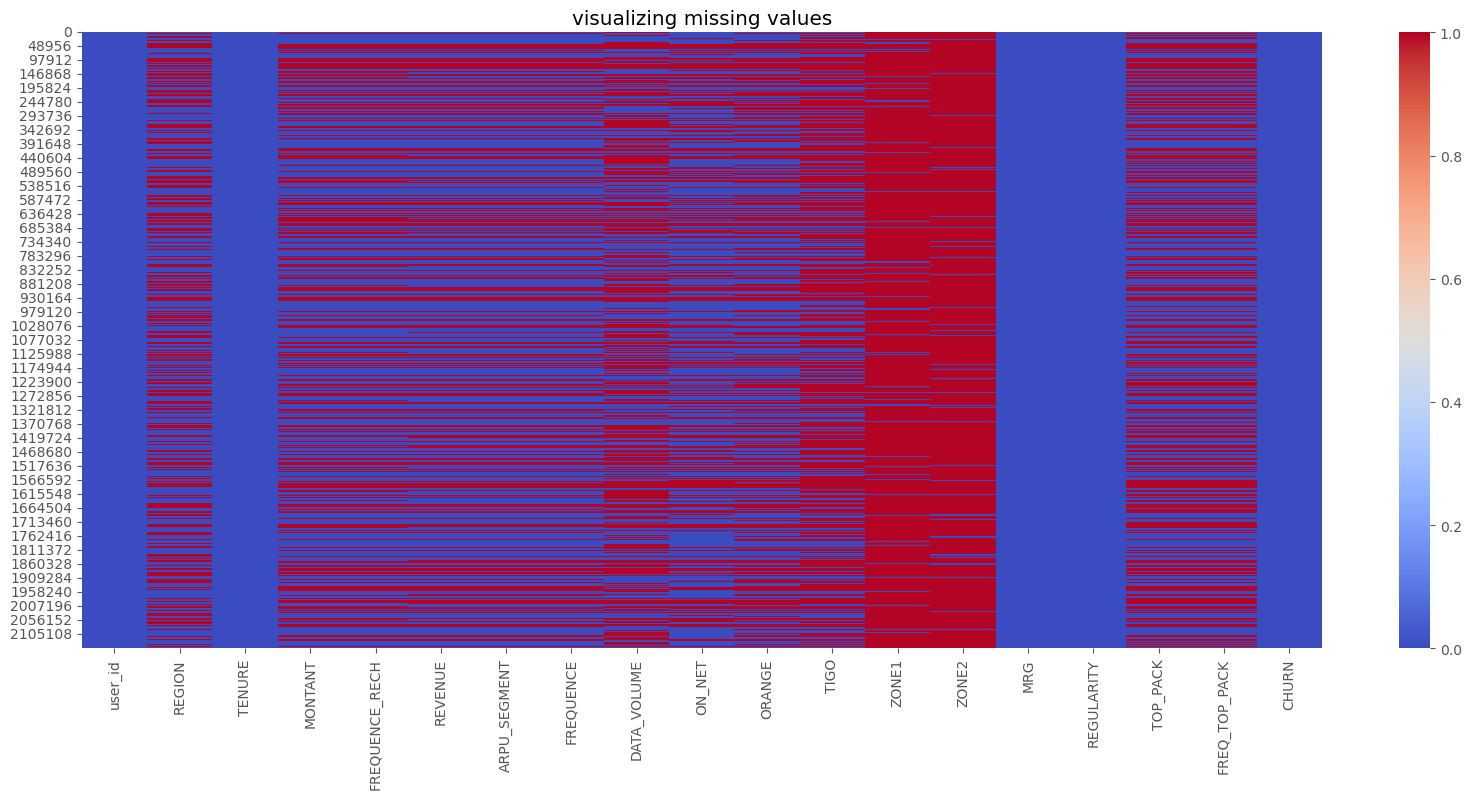

In [8]:
# visualize the missing values
plt.figure(figsize = (20, 8))
plt.title('visualizing missing values')
sns.heatmap(df.isnull(), cbar = True, cmap = 'coolwarm')
plt.show()

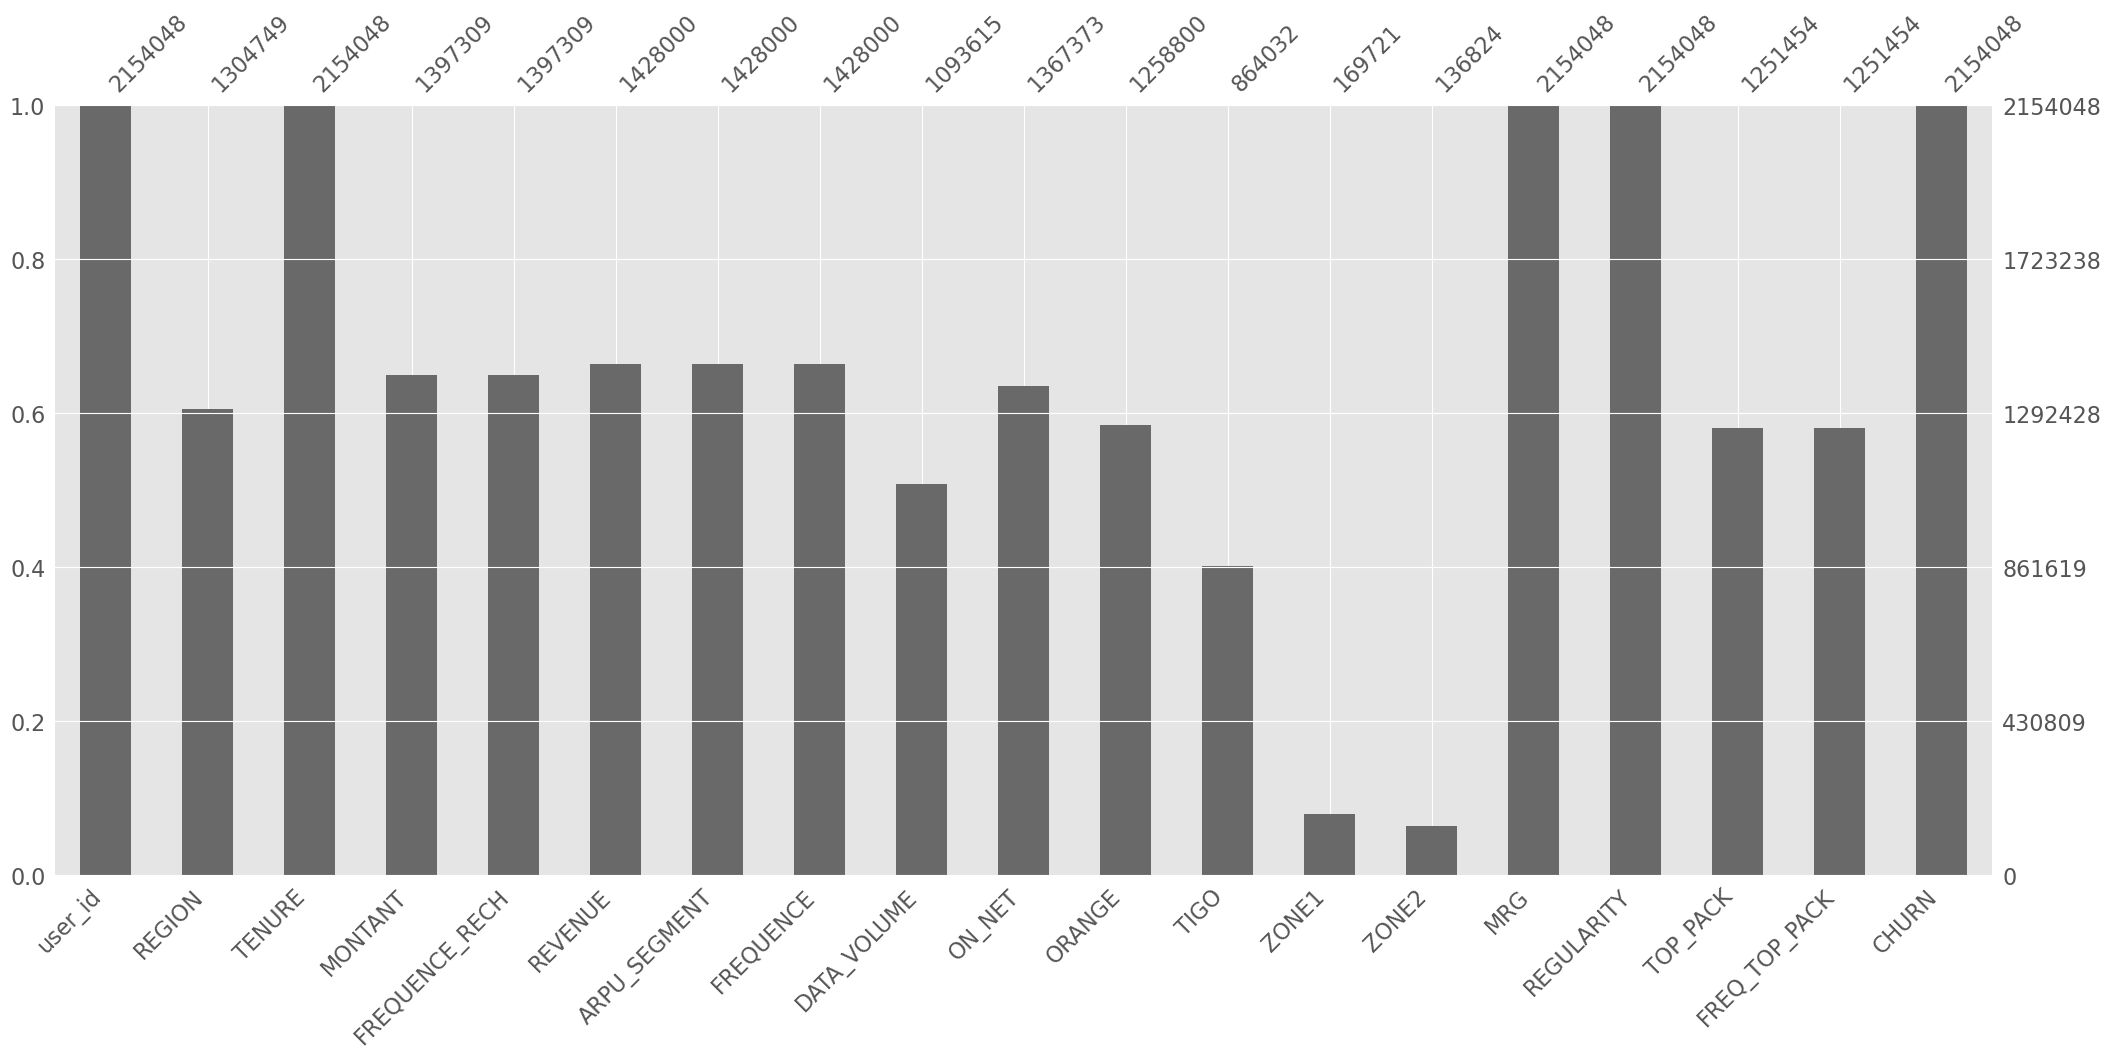

In [8]:
# pattern of missingness
import missingno as msno
msno.bar(df)
plt.show()

In [9]:
# summary statistics of the data
df.describe().astype('int')

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1397309,1397309,1428000,1428000,1428000,1093615,1367373,1258800,864032,169721,136824,2154048,1251454,2154048
mean,5532,11,5510,1836,13,3366,277,95,23,8,7,28,9,0
std,7111,13,7187,2395,14,13304,872,204,63,41,33,22,12,0
min,10,1,1,0,1,0,0,0,0,0,0,1,1,0
25%,1000,2,1000,333,3,0,5,7,2,0,0,6,2,0
50%,3000,7,3000,1000,9,257,27,29,6,1,2,24,5,0
75%,7350,16,7368,2456,20,2895,156,99,20,3,5,51,12,0
max,470000,133,532177,177392,91,1823866,50809,21323,4174,4792,3697,62,713,1


In [10]:
# extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# confirm if there are negative for each columns
num_vars_negative = (num_vars < 0).sum()

print(num_vars_negative)

MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64


MONTANT            87725
FREQUENCE_RECH     80354
REVENUE            91172
ARPU_SEGMENT       91165
FREQUENCE          69934
DATA_VOLUME       140777
ON_NET            202960
ORANGE            132024
TIGO              100126
ZONE1              26004
ZONE2              16050
REGULARITY             0
FREQ_TOP_PACK      91263
CHURN             403986
dtype: int64


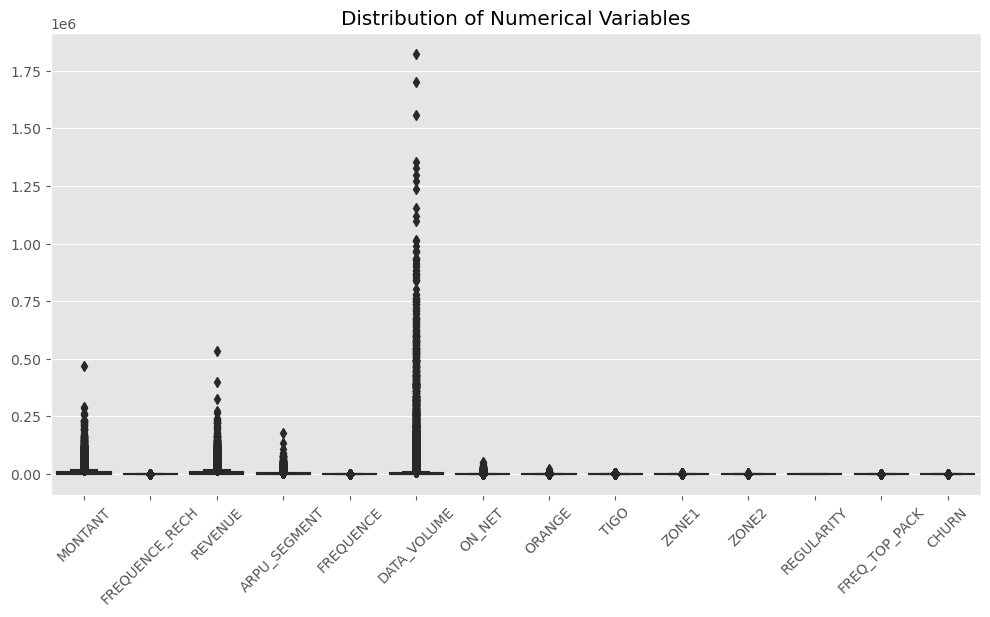

In [11]:
# Extract the numerical columns from the dataset
num_vars = df.select_dtypes(include=['int64', 'float64'])

# Calculate the number of outliers for each numerical variable
outliers_count = ((num_vars < num_vars.quantile(0.25) - 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))) |
                  (num_vars > num_vars.quantile(0.75) + 1.5 * (num_vars.quantile(0.75) - num_vars.quantile(0.25))))
outliers_count = outliers_count.sum()

# Display the number of outliers in a table
print(outliers_count)

# Create a boxplot to show the distribution of each numerical variable
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables')
plt.xticks(rotation=45)
plt.show()


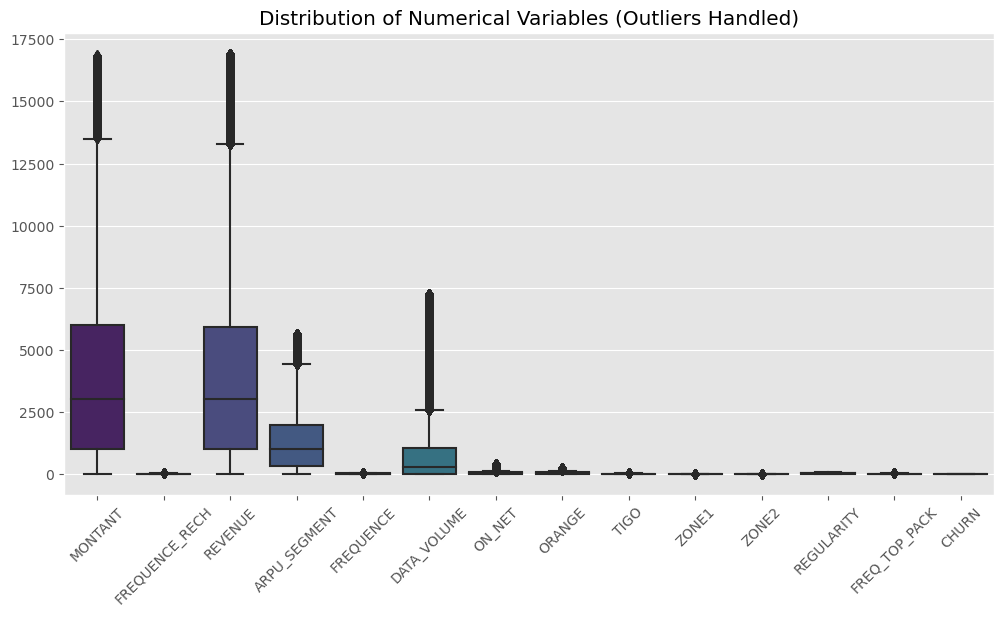

In [12]:
# Calculate the median of each numerical variable
medians = num_vars.median()

# Replace outliers with the median of each variable
for column in num_vars.columns:
    q1 = num_vars[column].quantile(0.25)
    q3 = num_vars[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    num_vars[column] = num_vars[column].apply(lambda x: medians[column] if x < lower_bound or x > upper_bound else x)

# Create a boxplot to show the distribution of each numerical variable after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_vars, palette='viridis')
plt.title('Distribution of Numerical Variables (Outliers Handled)')
plt.xticks(rotation=45)
plt.show()


# Data Validation 

In [13]:
# select the numerical variables
print(num_vars)

# value counts for numerical variables
for column in num_vars:
    print(df[column].value_counts())

         MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  \
0         4250.0            15.0   4251.0        1417.0       17.0   
1            NaN             NaN      NaN           NaN        NaN   
2         3600.0             2.0   1020.0         340.0        2.0   
3        13500.0            15.0  13502.0        4501.0       18.0   
4         1000.0             1.0    985.0         328.0        1.0   
...          ...             ...      ...           ...        ...   
2154043      NaN             NaN      NaN           NaN        NaN   
2154044   6100.0            15.0   5800.0        1933.0       15.0   
2154045      NaN             NaN      NaN           NaN        NaN   
2154046  10000.0            11.0   7120.0        2373.0       13.0   
2154047      NaN             NaN      NaN           NaN        NaN   

         DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  REGULARITY  \
0                4.0    27.0    46.0   1.0    1.0    2.0          54   
1              

In [14]:
# select the categorical variables
cat_vars = df.select_dtypes(include=['category', 'object'])
print(cat_vars)

# value counts for categorical variables
for column in cat_vars:
    print(df[column].value_counts())

                                          user_id  REGION         TENURE MRG  \
0        00000bfd7d50f01092811bc0c8d7b0d6fe7c3596  FATICK   K > 24 month  NO   
1        00000cb4a5d760de88fecb38e2f71b7bec52e834     NaN  I 18-21 month  NO   
2        00001654a9d9f96303d9969d0a4a851714a4bb57     NaN   K > 24 month  NO   
3        00001dd6fa45f7ba044bd5d84937be464ce78ac2   DAKAR   K > 24 month  NO   
4        000028d9e13a595abe061f9b58f3d76ab907850f   DAKAR   K > 24 month  NO   
...                                           ...     ...            ...  ..   
2154043  ffffe85215ddc71a84f95af0afb0deeea90e6967     NaN   K > 24 month  NO   
2154044  ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15   THIES   K > 24 month  NO   
2154045  fffff172fda1b4bb38a95385951908bb92379809     NaN   K > 24 month  NO   
2154046  fffff5911296937a37f09a37a549da2e0dad6dbb   THIES   K > 24 month  NO   
2154047  fffff6dbff1508ea2bfe814e5ab2729ce6b788c2     NaN   K > 24 month  NO   

                               TOP_PACK

In [15]:
# Handling of missing values in the dataset
df['MONTANT'].fillna(df['MONTANT'].median(), inplace=True)
df['FREQUENCE_RECH'].fillna(df['FREQUENCE_RECH'].median(), inplace=True)
df['REVENUE'].fillna(df['REVENUE'].median(), inplace=True)
df['ARPU_SEGMENT'].fillna(df['ARPU_SEGMENT'].median(), inplace=True)
df['FREQUENCE'].fillna(df['FREQUENCE'].median(), inplace=True)
df['DATA_VOLUME'].fillna(df['DATA_VOLUME'].median(), inplace=True)
df['ON_NET'].fillna(df['ON_NET'].median(), inplace=True)
df['ORANGE'].fillna(df['ORANGE'].median(), inplace=True)
df['TIGO'].fillna(df['TIGO'].median(), inplace=True)
df['ZONE1'].fillna(df['ZONE1'].median(), inplace=True)
df['ZONE2'].fillna(df['ZONE2'].median(), inplace=True)
df['FREQ_TOP_PACK'].fillna(df['FREQ_TOP_PACK'].median(), inplace=True)
df['TOP_PACK'].fillna(df['TOP_PACK'].mode()[0], inplace=True)
df['REGION'].fillna(df['REGION'].mode()[0], inplace=True)

In [16]:
# confirm if there are missing values
df.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

# Convert Categorical Columns to Numerical
- One Hot Encoding
- Label Encoder

In [23]:
cat_vars.columns.tolist()

['user_id', 'REGION', 'TENURE', 'MRG', 'TOP_PACK']

In [24]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['REGION', 'TENURE', 'MRG', 'TOP_PACK']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the updated DataFrame
print(df.head())

                                    user_id  REGION  TENURE  MONTANT  \
0  00000bfd7d50f01092811bc0c8d7b0d6fe7c3596       2       7   4250.0   
1  00000cb4a5d760de88fecb38e2f71b7bec52e834       0       5   3000.0   
2  00001654a9d9f96303d9969d0a4a851714a4bb57       0       7   3600.0   
3  00001dd6fa45f7ba044bd5d84937be464ce78ac2       0       7  13500.0   
4  000028d9e13a595abe061f9b58f3d76ab907850f       0       7   1000.0   

   FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  ON_NET  \
0            15.0   4251.0        1417.0       17.0          4.0   388.0   
1             7.0   3000.0        1000.0        9.0        257.0    27.0   
2             2.0   1020.0         340.0        2.0        257.0    90.0   
3            15.0  13502.0        4501.0       18.0      43804.0    41.0   
4             1.0    985.0         328.0        1.0        257.0    39.0   

   ORANGE  TIGO  ZONE1  ZONE2  MRG  REGULARITY  TOP_PACK  FREQ_TOP_PACK  CHURN  
0    46.0   1.0    1.0    2.0

In [20]:
# wite a code for the 'CHURN' showing different category. 0= No churn,1= churn
#def churn_category(x):
    #if x==1:
        #return 'churn'
    #else:
        #return 'No churn'
#sampled_df['CHURN']=sampled_df['CHURN'].apply(churn_category)
#sampled_df.head()

In [21]:
#churn_category_dist = sampled_df['CHURN'].value_counts()
#churn_category_dist

In [22]:
# visualize in a bar chart

#churn_category_dist.plot(kind='bar', color='blue', figsize = (8, 5))
#plt.xticks(rotation=45)
#plt.title('Distribution of Churn')
#plt.xlabel('Churn Status')
#plt.ylabel('Count')
#plt.show()

# Feature Selection

In [25]:
# Perform random sampling with a specified fraction of rows (e.g., 10%)
sampled_df = df.sample(frac=0.1, random_state=42)  # Specify random_state for reproducibility
# Display the sampled DataFrame
print(sampled_df.head())

# Save the sampled DataFrame to a CSV file
sampled_df.to_csv('sampled_dataset.csv', index=False)  # Set index=False to exclude the index column
      

                                          user_id  REGION  TENURE  MONTANT  \
566939   4361fb4fad11445ce7ec1ee054f41de5deba6fef       0       7   4200.0   
620796   49c7c0d15acb8c92f9f4d8d3342385e996a9d292       9       7   1000.0   
299703   23b4832c1ebee58bfdd2cc0c3886523d93f03c97       0       7   3000.0   
1051494  7d0e2093cc4ca7fa9c50d68b539922a26a85306e       6       7   5300.0   
527353   3eac0fdfcf454d2857f26b6d41479033b7bb7366      11       7    200.0   

         FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  FREQUENCE  DATA_VOLUME  \
566939              8.0   4199.0        1400.0       14.0          1.0   
620796              2.0   1000.0         333.0        2.0        257.0   
299703              7.0   3000.0        1000.0        9.0        257.0   
1051494            15.0   5150.0        1717.0       18.0        257.0   
527353              1.0    399.0         133.0        3.0         32.0   

         ON_NET  ORANGE  TIGO  ZONE1  ZONE2  MRG  REGULARITY  TOP_PACK  \
566939    31

In [26]:
# Load your sampled dataset into a pandas DataFrame
sampled_df = pd.read_csv('sampled_dataset.csv')

sampled_df.drop('user_id',axis=1,inplace=True)

In [27]:
# Assuming 'CHURN' is your target variable
X = sampled_df.drop('CHURN', axis=1)  # Features
y = sampled_df['CHURN']                # Target variable


In [28]:
y.head()


0    0
1    0
2    1
3    0
4    0
Name: CHURN, dtype: int64

In [29]:
X.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,0,7,4200.0,8.0,4199.0,1400.0,14.0,1.0,314.0,132.0,6.0,1.0,2.0,0,20,107,3.0
1,9,7,1000.0,2.0,1000.0,333.0,2.0,257.0,59.0,3.0,6.0,1.0,2.0,0,17,112,1.0
2,0,7,3000.0,7.0,3000.0,1000.0,9.0,257.0,27.0,29.0,6.0,1.0,2.0,0,2,18,5.0
3,6,7,5300.0,15.0,5150.0,1717.0,18.0,257.0,1482.0,88.0,6.0,1.0,2.0,0,50,107,7.0
4,11,7,200.0,1.0,399.0,133.0,3.0,32.0,7.0,0.0,6.0,1.0,2.0,0,39,30,1.0


In [30]:
# value count of the target y
y.value_counts()

0    174908
1     40497
Name: CHURN, dtype: int64

# Oversampling using SMOTE (Synthetic Minority Over-sampling Technique)
*SMOTE is a technique used to balance imbalanced datasets(target), where one class is significantly smaller than the other. It creates synthetic samples by creating new instances that are similar to the minority class. This helps prevent overfitting, which is a problem that can occur when using other techniques like ROS(Random Over Sampling).*


In [31]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Resampled the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the class distribution before and after resampling
print('Class distribution before resampling: {}'.format(Counter(y)))
print('Class distribution after resampling: {}'.format(Counter(y_resampled)))

Class distribution before resampling: Counter({0: 174908, 1: 40497})
Class distribution after resampling: Counter({0: 174908, 1: 174908})


# Train-Test-Split
Split the dataset into training and testing sets. We will allocate a certain percentage of 80-20 for training and testing, respectively. This will be done using the train_test_split function from scikit-learn.


In [32]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print('\n', X_train.head(2))
print('\n', X_test.head(2))
print('\n', y_train.head(2))
print('\n', y_test.head(2))


         REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
33659        6       7   7200.0            13.0   7199.0        2400.0   
185862      12       7    200.0             1.0    200.0          67.0   

        FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  MRG  \
33659        17.0          3.0   231.0   181.0   6.0    1.0    2.0    0   
185862        2.0        257.0     0.0     1.0   6.0    1.0    2.0    0   

        REGULARITY  TOP_PACK  FREQ_TOP_PACK  
33659           50        96           10.0  
185862          31        18            5.0  

         REGION  TENURE  MONTANT  FREQUENCE_RECH  REVENUE  ARPU_SEGMENT  \
134047      12       7   3000.0             7.0   3000.0        1000.0   
317909       0       7   3000.0             7.0   3000.0        1000.0   

        FREQUENCE  DATA_VOLUME  ON_NET  ORANGE  TIGO  ZONE1  ZONE2  MRG  \
134047        9.0        257.0     0.0     0.0   6.0    1.0    2.0    0   
317909        9.0        257.0    27

In [33]:
print(f'The X_train shape: {X_train.shape}')
print(f'The X_test shape: {X_test.shape}')
print(f'The y_train shape: {y_train.shape}')
print(f'The y_test shape: {y_test.shape}')

The X_train shape: (279852, 17)
The X_test shape: (69964, 17)
The y_train shape: (279852,)
The y_test shape: (69964,)


# Scaling of Data
Data scaling is a pre-processing step in machine learning that is used to standardize the range of independent variables or features of a dataset. It is important because many machine learning models assume that all features are on the same scale. If the features are not on the same scale, certain models may be biased towards features with larger values.

There are many methods for scaling data in Python, including:

1. Min-max scaling: This method scales the data to a fixed range, usually between 0 and 1. It can be implemented using the `MinMaxScaler` class from the `sklearn.preprocessing` module.

2. Standardization: This method scales the data to have a mean of 0 and a standard deviation of 1. It can be implemented using the `StandardScaler` class from the `sklearn.preprocessing` module.

3. Robust scaling: This method scales the data based on the median and interquartile range, making it more robust to outliers. It can be implemented using the `RobustScaler` class from the `sklearn.preprocessing` module.

4. Normalization: This method scales each data point to have a length of 1, which can be useful for certain distance-based algorithms. It can be implemented using the `Normalizer` class from the `sklearn.preprocessing` module.

These methods can be applied to both numerical and categorical features, depending on the specific use case.

## MinMax Scaler 


In [34]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training features
scaler.fit(X_train)

# Transform the training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Selection
The following algortihms for the model selection include:
- Logistic Regression
- Decision Tree
- Support Vector Machine
- K-Nearest Neighbor


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn import metrics

# for hyperparameter tuning using k-fold cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict

# Model Training
- Import the necessary libraries for each algorithms
- create an instance of each model
- fit the models to the training data using the fit method

### Logistic Regression

In [36]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

In [37]:
from sklearn.metrics import accuracy_score
# create predictions
y_pred = lr_model.predict(X_test_scaled)

# print accuracy score for Logistic Regression
print(f'The accuracy of the logistic regression is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the logistic regression is 83.39999999999999 %


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_calculator(y_true, y_pred, model_name):
    '''
    Calculates and return a dictionary of performance metrics for a binary classification model
    '''
    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create a dictionary of results
    results = {'Model': model_name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
    return results

lr_result = metrics_calculator(y_test, y_pred, 'lr_model')
lr_result

{'Model': 'lr_model',
 'Accuracy': 0.8344863072437253,
 'Precision': 0.7943640709523211,
 'Recall': 0.9025987020783899,
 'F1-Score': 0.8450297093303356}

#### Decision Tree

In [39]:
# Create an instance of DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

# Fit the model on the scaled training
dt_model.fit(X_train_scaled, y_train)
dt_probs = dt_model.predict_proba(X_test_scaled)[:, 1]

In [40]:
# Predict the classes of the testing data
y_pred = dt_model.predict(X_test_scaled)

# print accuracy score for DecisionTree Classifier
print(f'The accuracy of the DecisionTree is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the DecisionTree is 86.8 %


In [41]:
dt_result = metrics_calculator(y_test, y_pred, 'dt_model')
dt_result

{'Model': 'dt_model',
 'Accuracy': 0.8679320793550969,
 'Precision': 0.8283622075370601,
 'Recall': 0.9281568941364818,
 'F1-Score': 0.8754246885617213}

#### K-Nearest Neighbour 

In [42]:
# Create an instance of K-Nearest Neighbour
knn_model = KNeighborsClassifier()

# Fit the model on the scaled training
knn_model.fit(X_train_scaled, y_train)
knn_probs = knn_model.predict_proba(X_test_scaled)[:, 1]

In [43]:
# Predict the classes of the testing data
y_pred = knn_model.predict(X_test_scaled)

# print accuracy score for K-Nearest Neigbour
print(f'The accuracy of the KNN is {accuracy_score(y_pred, y_test).round(3)*100} ' + '%')

The accuracy of the KNN is 85.1 %


In [44]:
knn_result = metrics_calculator(y_test, y_pred, 'knn_model')
knn_result

{'Model': 'knn_model',
 'Accuracy': 0.8511663141043966,
 'Precision': 0.8238163028577454,
 'Recall': 0.893364590182681,
 'F1-Score': 0.8571820438616944}

## Model Evaluation
Evaluate the models using classification reports and confusion matrices.

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   Not-CHURH      0.887     0.766     0.822     34985
       CHURN      0.794     0.903     0.845     34979

    accuracy                          0.834     69964
   macro avg      0.841     0.834     0.834     69964
weighted avg      0.841     0.834     0.834     69964



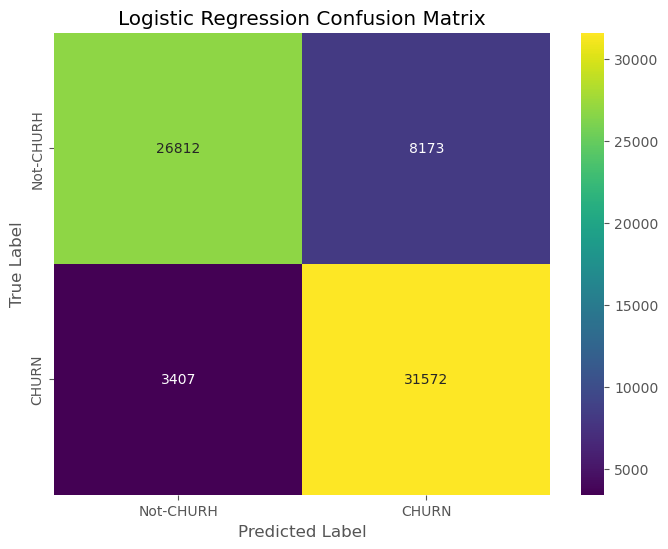

Decision Tree Classification Report:
              precision    recall  f1-score   support

   Not-CHURH      0.918     0.808     0.859     34985
       CHURN      0.828     0.928     0.875     34979

    accuracy                          0.868     69964
   macro avg      0.873     0.868     0.867     69964
weighted avg      0.873     0.868     0.867     69964



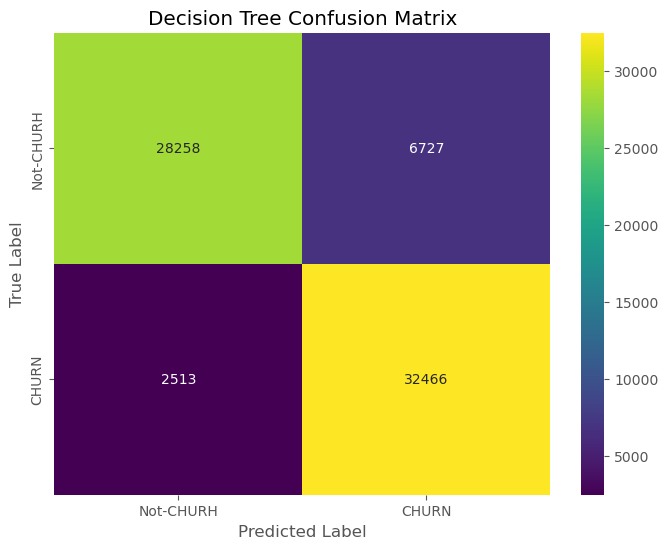

KNN Classification Report:
              precision    recall  f1-score   support

   Not-CHURH      0.884     0.809     0.845     34985
       CHURN      0.824     0.893     0.857     34979

    accuracy                          0.851     69964
   macro avg      0.854     0.851     0.851     69964
weighted avg      0.854     0.851     0.851     69964



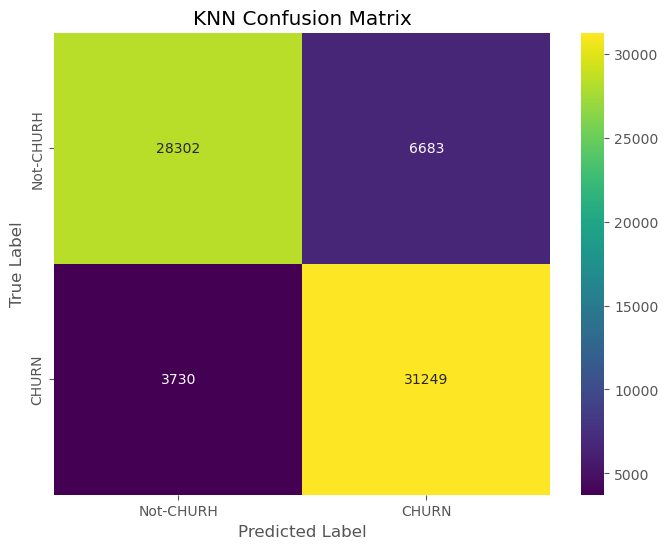

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
# import seaborn as sns
# import matplotlib.pyplot as plt

# Create a list of models and their corresponding names
models = [lr_model, dt_model,knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'KNN']

# Set the labels
labels = ['Not-CHURH', 'CHURN']

# Set the desired number of decimal places
decimal_places = 3

# Loop through each model and generate a classification report and confusion matrix
for model, model_name in zip(models, model_names):
    # Predict the classes of the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Generate the classification report with the specified number of decimal places
    report = classification_report(y_test, y_pred, target_names=labels, digits=decimal_places)
    print(f'{model_name} Classification Report:\n{report}')
    
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [46]:
# Concatenate results into a single dataframe all the model metric calculator results
results_df = pd.DataFrame([lr_result, dt_result, knn_result])

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,lr_model,0.834486,0.794364,0.902599,0.845030
1,dt_model,0.867932,0.828362,0.928157,0.875425
2,knn_model,0.851166,0.823816,0.893365,0.857182


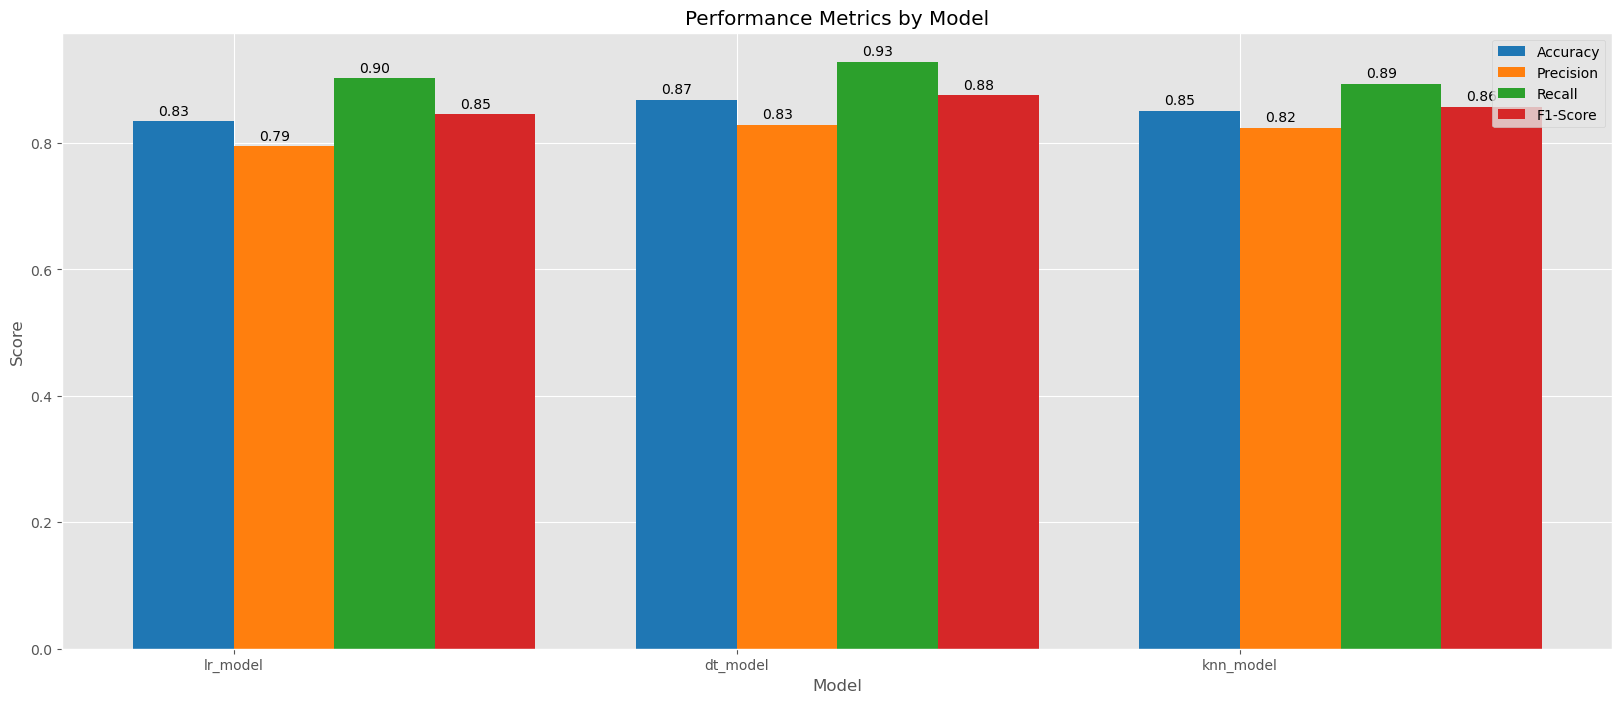

In [47]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Set the width of the bars
bar_width = 0.2

# Create a bar chart of the metrics for each model
models = results_df['Model']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * bar_width, results_df[metric], width=bar_width, color=colors[i], label=metric)
    for j, value in enumerate(results_df[metric]):
        plt.text(j + i * bar_width - 0.05, value + 0.01, '{:.2f}'.format(value))

# Add labels and legend
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics by Model')
plt.xticks(np.arange(len(models)) + bar_width / 2, models)
plt.legend()

# Show the chart
plt.show()


## AUC-ROC
The AUC-ROC scores of the models to their accuracy score and confusion matrices can be used to get a complete picture of each model's performance. The AUC-ROC score measures the overall performance of a binary classifier, taking into account bith true positive rate and false positive rate. The higher the AUC-ROC score, the better the model's ability to distinguish between positive and negative classes. Therefore, a model with a higher AUC-ROC score is generally considered to be better than a model with a lower score.

In [48]:
# Calculate the AUC-ROC for logistic regression
lr_auc = roc_auc_score(y_test, lr_probs)

# Calculate the AUC-ROC for decision tree
dt_auc = roc_auc_score(y_test, dt_probs)
# Calculate the AUC-ROC for KNN
knn_auc = roc_auc_score(y_test, knn_probs)

# Print the AUC-ROC scores
print(f'Logistic Regression AUC-ROC: {lr_auc:.2f}')
print(f'Decision Tree AUC-ROC: {dt_auc:.2f}')
print(f'K-Nearest Neighbor AUC-ROC: {knn_auc:.2f}')

Logistic Regression AUC-ROC: 0.91
Decision Tree AUC-ROC: 0.88
K-Nearest Neighbor AUC-ROC: 0.91


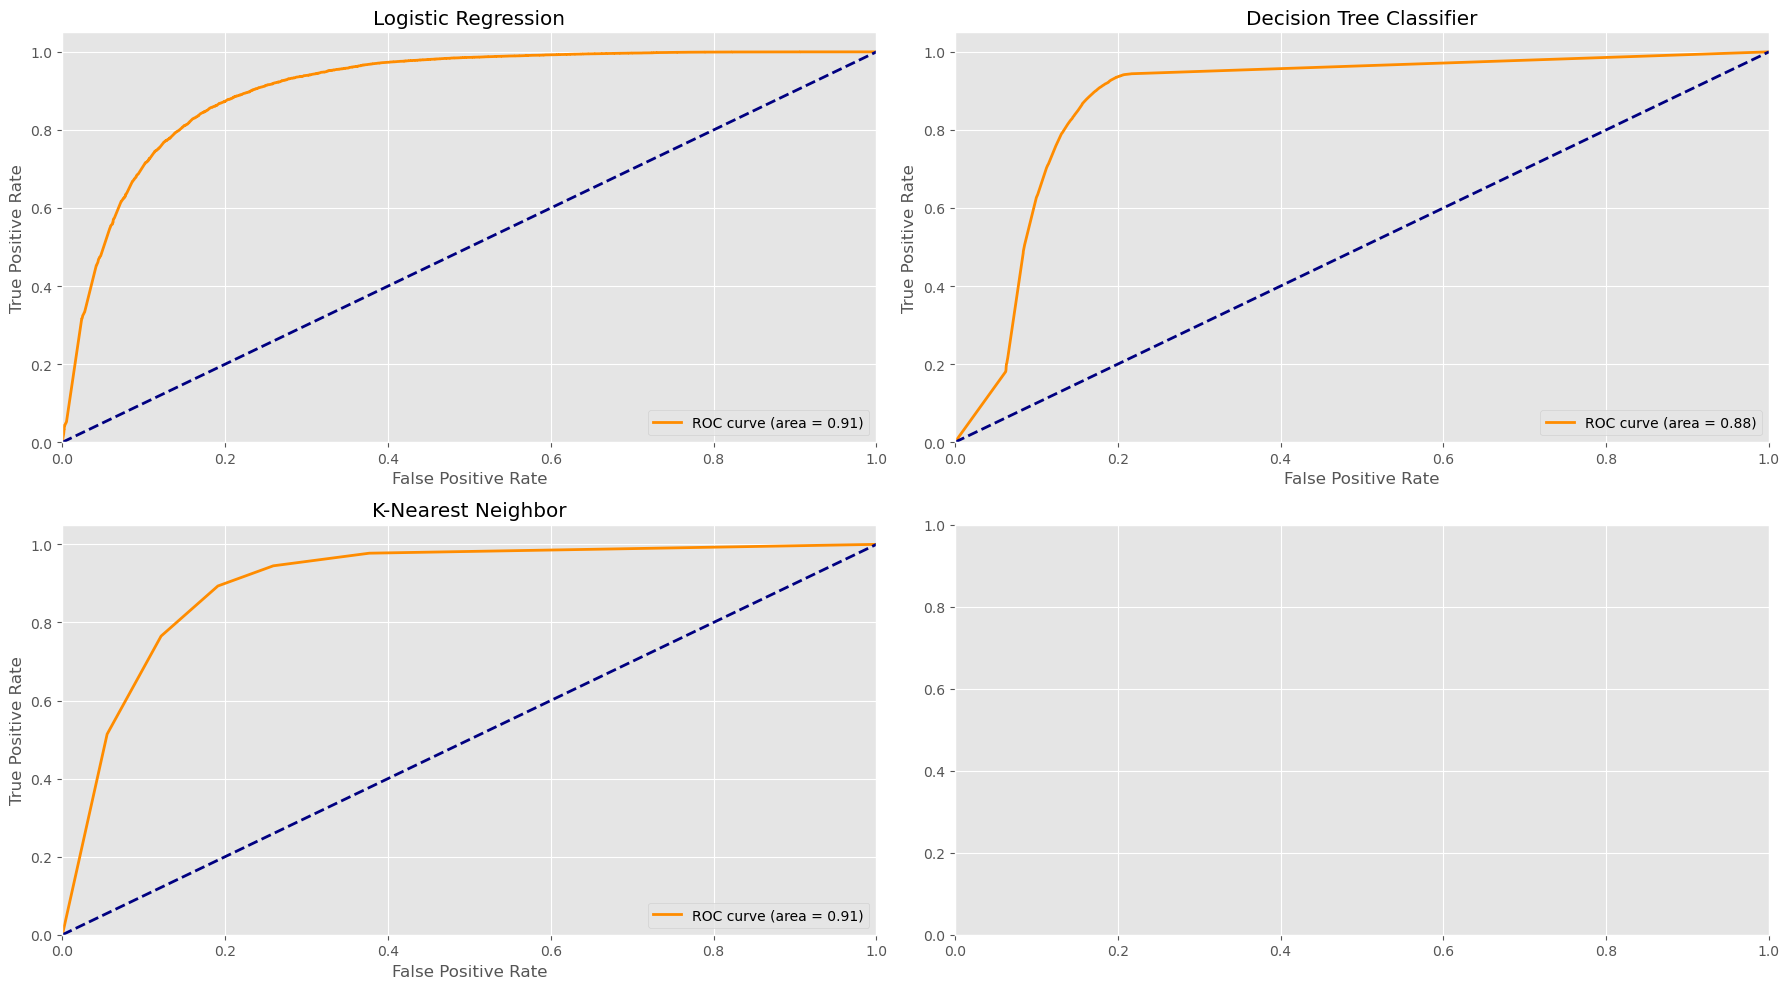

In [49]:
from sklearn.metrics import roc_curve, auc

# Define the models and their names
models = [lr_model, dt_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree Classifier', 'K-Nearest Neighbor']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
axes = axes.flatten()

# Plot ROC curve and score for each model
for i, (model, name) in enumerate(zip(models, model_names)):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    axes[i].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    axes[i].plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
    axes[i].set_xlim([0, 1])
    axes[i].set_ylim([0, 1.05])
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(name)
    axes[i].legend(loc='lower right')

# Adjust spacing between subplots
plt.tight_layout()

# Show the chart
plt.show()



In [50]:
# Feature importances using Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances from the trained classifier
feature_importances = rf_classifier.feature_importances_

# Display feature importances alongside feature names
feature_names = X.columns
feature_importances_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importances_dict.items(), key=lambda x: x[1], reverse=True)


for feature, importance in sorted_feature_importance:
    print(f'{feature}: {importance:.2f}')

REGULARITY: 0.28
REGION: 0.15
ARPU_SEGMENT: 0.09
REVENUE: 0.08
FREQUENCE: 0.07
ON_NET: 0.05
DATA_VOLUME: 0.05
MONTANT: 0.05
FREQUENCE_RECH: 0.04
TOP_PACK: 0.03
ORANGE: 0.03
FREQ_TOP_PACK: 0.03
TIGO: 0.02
ZONE2: 0.01
TENURE: 0.01
ZONE1: 0.01
MRG: 0.00


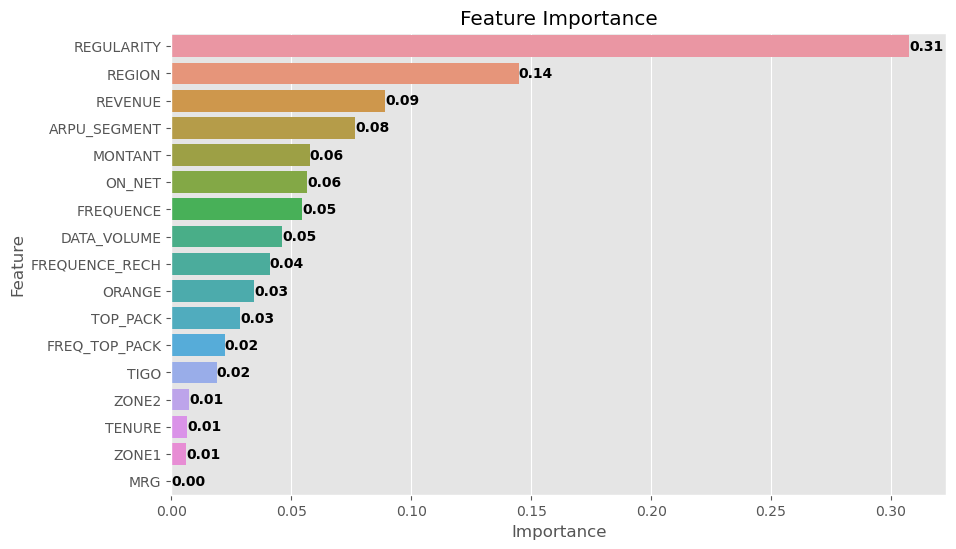

In [49]:
# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances as a bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

# Annotate the bars with the importance values
for i, v in enumerate(feature_importance_df['Importance']):
    ax.text(v, i, f'{v:.2f}', color='black', va='center', fontsize=10, fontweight='bold')

plt.show()

## A Bit of Features Selection
We will use the following features; REGULARITY, followed by REGION, REVENUE, ARPU_SEGMENT, MONTANT AND ON_NET  to retrain the Decision Tree model.

In [51]:
# split into training and validation set using 30-70 split ratio
X_train, X_valid, y_train, y_valid = train_test_split(X_resampled, y_resampled, test_size=0.3)

X_train2 = X_train[['REGULARITY', 'REGION', 'REVENUE', 'ARPU_SEGMENT', 'MONTANT','ON_NET']]
X_valid2 = X_valid[['REGULARITY', 'REGION', 'REVENUE', 'ARPU_SEGMENT', 'MONTANT','ON_NET']]

In [52]:
# Since Decision Tree model is the best performing model

# fit the model on the new training set
dt_model.fit(X_train2, y_train)

# predit on the new testing set
y_valid2_pred = dt_model.predict(X_valid2)

In [53]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

Accuracy Score: 0.86


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_valid2_pred, y_valid)
print(f'Accuracy Score: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_valid2_pred, y_valid)
print(f'Precision Score: {precision:.2f}')

# Calculate recall
recall = recall_score(y_valid2_pred, y_valid)
print(f'Recall Score: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_valid2_pred, y_valid)
print(f'F1-score: {f1:.2f}')


Accuracy Score: 0.86
Precision Score: 0.92
Recall Score: 0.82
F1-score: 0.87


# Saving the base line model using Pickle
- In Python,the pickle module is used for serializing objects.serialization is the process of converting a python object into a byte stream,and deserialization is the reverse process of reconstructing the python object from the byte stream

In [55]:
# Saving the model
import pickle
pickle_out=open('classifier.pkl',mode='wb')
pickle.dump(dt_model,pickle_out)
pickle_out.close()

## Model Deployment of the CHURN Prediction Model using Streamlit 
- We will start with the basic installations:

In [56]:
!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

- we have installed 3 libraries here.pyngrok is a python wrapper for ngrok which helps to open secure tunnels from public URLs to localhost.This will help us host our web app.Streamlit will be used to make our web app.

In [57]:
%%writefile app.py

import pickle
import streamlit as st

#Loading the trained model

pickle_in = open('classifier.pkl','rb')
classifier=pickle.load(pickle_in)

@st.cache()
 
# defining the function which will make the prediction using the data which the user input
def prediction(REGULARITY, REGION, REVENUE,ARPU_SEGMENT,MONTANT,ON_NET):
    
    

    # Making predictions
    prediction=classifier.predict([[REGULARITY, REGION, REVENUE,ARPU_SEGMENT,MONTANT,ON_NET]])
    
    if prediction ==0:
        pred='Rejected'
    else:
        pred='Approved'
        
    return pred
# This is the main function in which we define our webpage 

def main():
    # front end element of the web page
    
    html_temp = '''
    <div style = 'background-colour:yellow;padding:13px'>
    <h1 style = 'color:yellow;text_align:center;'>Streamlit CHURH Prediction ML App </h1>
    </div>
    '''
     
   # display the front end aspect 
    st.markdown(html_temp,unsafe_allow_html=True)

   # following Lines create boxes in which user can enter data required to make prediction
    REGULARITY=st.number_input("REGULARITY")
    REGION=st.selectbox('Region',('Dakar','Saint_louis','Louga','Kaolack','Diourbel','Tambacounda','Kaffrine',
                                 'Kolda','Fatick','Matam','Ziguinchor','Sedhiou','Kedougou'))
    REVENUE=st.number_input("REVENUE")
    ARPU_SEGMENT=st.number_input("ARPU_SEGMENT")
    MONTANT=st.number_input("MONTANT")
    ON_NET=st.number_input("ON_NET")
    result = ""

#when 'predict' is clicked,make the prediction and store it
    if st.button("Predict"):
        result=prediction( REGULARITY, REGION, REVENUE,ARPU_SEGMENT,MONTANT,ON_NET)
        st.success('Customer is {}'.format(result))
        print(LoanAmount)
        
if __name__== '__main__':
    main()

Overwriting app.py


In [59]:
from pyngrok import ngrok

# set your ngrok authentication token 

ngrok.set_auth_token("2dDbZvxrCIoD7SEo1FLJ48TwkyS_4TB1bqKTL4iHCZXQGt5Ap")

# connect to ngrok with authentication 
public_url=ngrok.connect(8501)
public_url

<NgrokTunnel: "https://05d9-102-88-84-156.ngrok-free.app" -> "http://localhost:8501">

t=2024-03-12T09:40:09+0100 lvl=eror msg="heartbeat timeout, terminating session" obj=tunnels.session obj=csess id=690213d96215 clientid=1a474becf0af71a460bbcb1ca42a03e9
t=2024-03-12T09:40:09+0100 lvl=eror msg="session closed, starting reconnect loop" obj=tunnels.session obj=csess id=6058e79c8987 err="session closed"
t=2024-03-12T09:40:09+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=6058e79c8987 err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-03-12T09:40:10+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=6058e79c8987 err="failed to dial ngrok server with address \"connect.us.ngrok-agent.com:443\": dial tcp: lookup connect.us.ngrok-agent.com: no such host"
t=2024-03-12T09:40:11+0100 lvl=eror msg="failed to reconnect session" obj=tunnels.session obj=csess id=6058e79c8987 err="failed to dial ngrok server with address \"conn